In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [2]:
d = 4
x = np.random.randn(d)
T = np.random.randn(d, d)
B = np.random.randn(d, d)

xs = []
T = 1000

for i in range(T):
    u = np.zeros(d)
    u[T % d] = 1
    w = np.random.randn(d) / 10
    x = x / np.linalg.norm(x)
    x = np.dot(T, x) + np.dot(B, u) + w
    x = x / np.linalg.norm(x)
    xs.append(x)

xs = np.asarray(xs)
xs.shape

(1000, 4)

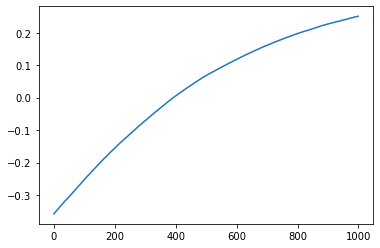

In [40]:
plt.plot(xs[:, 3])

(1000, 10)


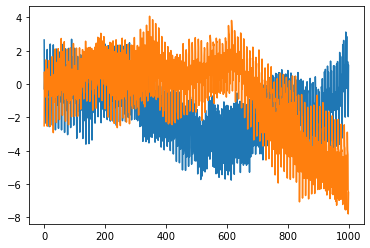

In [4]:
'''
From https://stats.stackexchange.com/questions/125946/generate-a-time-series-comprising-seasonal-trend-and-remainder-components-in-r
'''
TS = []
d = 10
T = 1000
p = 10
for i in range(d):
    gammas = [np.random.randn() for i in range(p)]
    mu = 0
    beta = 0

    ts = []
    for j in range(T):
        gamma = -np.sum(gammas[-p+1:]) + np.random.randn() * 0.1
        gammas.append(gamma)
        mu = mu + beta + np.random.randn() * 0.1
        beta += np.random.randn() * 0.0001

        y = mu + gamma + np.random.randn() * 0.1
        ts.append(y)
    
    TS.append(ts)

plt.plot(TS[1])
plt.plot(TS[2])

TS = np.array(TS).T
print(TS.shape)

<BarContainer object of 10 artists>

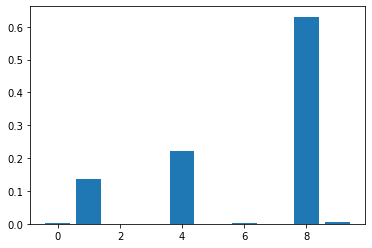

In [21]:
'''Dirichlet cascade'''
n1 = 10
n2 = 10

root = np.random.dirichlet(np.ones(d) / d * 10)
middle = np.random.dirichlet(root * 7)
leaf = np.random.dirichlet(middle * 3)
plt.bar(range(d), leaf)

In [82]:
n_1 = 10
n_2 = 10

middle_nodes = np.random.randn(n_1, d) * 0.1
middle_nodes = np.repeat(middle_nodes, n_2, axis=0)
final_nodes = middle_nodes + np.random.randn(n_1 * n_2, d) * 0.03

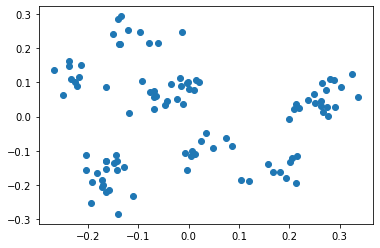

In [83]:
pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(final_nodes)

plt.scatter(emb_2d[:, 0], emb_2d[:, 1])

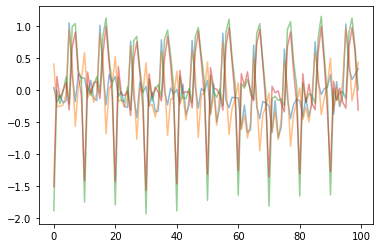

In [91]:
basis = TS
ts_final = basis @ final_nodes.T

with open('ts_gen.pkl', 'wb') as fout:
    pickle.dump(ts_final, fout)

plt.plot(ts_final[:100, 0], alpha=0.5)
plt.plot(ts_final[:100, 1], alpha=0.5)
plt.plot(ts_final[:100, 20], alpha=0.5)
plt.plot(ts_final[:100, 21], alpha=0.5)